# EDA and Word Cloud
Final Project for NLP

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
idA = {1:'American (Traditional)', 2:'Italian',3:'Mexican',4:'Chinese',5:'American (New)',6:'Japanese', 0:'Other'}
idB = {1:'Nightlife', 2:'Fast Food', 3:'Breakfast & Brunch', 4:'Coffee & Tea', 5:'Cafes', 0:'Other'}
df = pd.read_pickle("typeAB_not_0.pickle")
df_full = pd.read_pickle("filtered.pickle")

## Basic EDA

In [3]:
print(df.shape)
df.head()

(921172, 7)


,typeA,typeB,useful,cool,funny,review,stars
business_id,,,,,,,
pomGBqfbxcqPv14c3XH-ZQ,3,1,0,0,0,I love this place! My fiance And I go here atl...,5
EAwh1OmG6t6p3nRaZOW_AA,1,1,0,0,0,Ribs = amazing\n2 hour wait time= not so amazi...,4
q0n4I-zqiI47xispOqc1lA,2,5,0,0,0,"Delicious, friendly staff, cool atmosphere, al...",5
yz66FIUPDKGhILDWzRLeKg,3,1,1,0,0,I wish i could tell you all about the food but...,1
RyTEGJz5tG7zC73BdXt-cQ,2,5,0,0,0,Best veal sandwich ever ( i like rapini/ garli...,5


In [4]:
def pie_chart(df):
    """draw pie chart to analysis the category variable
    :parameter
        df: DataFrame"""
    star_count = []
    for i in [1,2,3,4,5]:
        star_count.append(sum(df['stars'] == i))
        print(i, 'star:%.2f' %(star_count[-1]/df.shape[0]*100))

    plt.pie(star_count, labels=[1,2,3,4,5])
    plt.show()

    typeA_count = []
    for i in [0,1,2,3,4,5,6]:
        typeA_count.append(sum(df['typeA'] == i))
        print(idA[i], 'typeA:%.2f' %(typeA_count[-1]/df.shape[0]*100))

    plt.pie(typeA_count, labels=[idA[x] for x in [0,1,2,3,4,5,6]])
    plt.show()

    typeB_count = []
    for i in [0,1,2,3,4,5]:
        typeB_count.append(sum(df['typeB'] == i))
        print(idB[i], 'typeB:%.2f' %(typeB_count[-1]/df.shape[0]*100))

    plt.pie(typeB_count, labels=[idB[x] for x in [0,1,2,3,4,5]])
    plt.show()


1 star:12.42
2 star:10.06
3 star:13.82
4 star:25.93
5 star:37.77


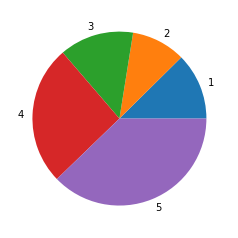

Other typeA:0.00
American (Traditional) typeA:29.33
Italian typeA:8.67
Mexican typeA:14.84
Chinese typeA:3.05
American (New) typeA:40.75
Japanese typeA:3.36


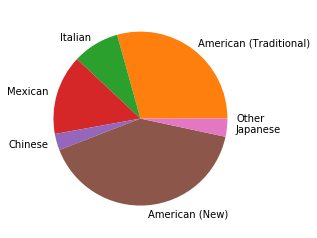

Other typeB:0.00
Nightlife typeB:54.12
Fast Food typeB:8.63
Breakfast & Brunch typeB:28.88
Coffee & Tea typeB:1.11
Cafes typeB:7.26


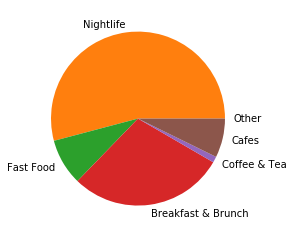

In [5]:
pie_chart(df)

## Word Cloud 

One word cloud example

I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!


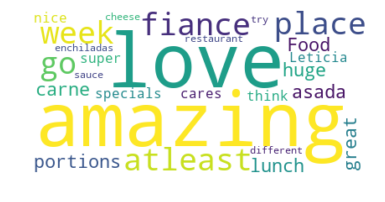

In [13]:
# conda install -c conda-forge wordcloud 
# conda install -c anaconda pillow=4.2.0
# Warning: May damage Pandas and Matplotlib

# One example

text = df['review'][0]
print(text)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate(text)
wordcloud.to_file("./image/first_review.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Use NLTK to tokenize and remove stop words

In [23]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [56]:
def sentence_tokenizer(s):
    """sentence tokenizer
    :parameter 
        s: String 
    :return
        tokenized_s: list"""
    s = s.lower()
    tokenized_s = nltk.word_tokenize(s)
    english_stopwords = set(stopwords.words('english'))
    tokenized_s = [w for w in tokenized_s if w not in english_stopwords if w.isalpha()]
    return tokenized_s


In [66]:
def word_freq_generator(df,column,condition):
    """generate word frequency for word cloud
    :parameter
        df: Pandas DataFrame
        column: String, name of column in df
        condition: String or int, the condition of filter
    :return
        word_freq_dict: dict, String -> frequency(int) 
        """
    word_freq_dict = {}
    stop_words = set(stopwords.words('english'))
    for review in tqdm(df[df[column] == condition]['review']):
        
        tokenized_review = nltk.word_tokenize(review.lower())
        for w in tokenized_review:
            if w not in stop_words and w.isalpha():
                if w in word_freq_dict:
                    word_freq_dict[w] += 1
                else:
                    word_freq_dict[w] = 0 
    return word_freq_dict
 

In [82]:
from wordcloud import WordCloud
def word_cloud(freq_dict, file_name=None):
    """generate word cloud from dict, String -> frequency(int)
    :parameter
        freq_dict:dict, String -> frequency(int)
        file_name: String
        """
    wordcloud = WordCloud(background_color='white',width=800, height=800).generate_from_frequencies(freq_dict)
    if file_name is not None:
        wordcloud.to_file('./image/'+file_name+'.png')
    plt.imshow(wordcloud,aspect='auto', interpolation='bilinear')
    plt.axis('off')
    plt.show()

100%|█████████████████████████████████████| 3888/3888 [00:05<00:00, 684.39it/s]


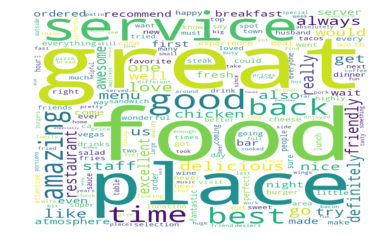

In [83]:
mini_df = df[:10000]
five_star_words = word_freq_generator(mini_df, 'stars', 5)
word_cloud(five_star_words,"five_star_2")

100%|█████████████████████████████████████| 1705/1705 [00:03<00:00, 453.69it/s]


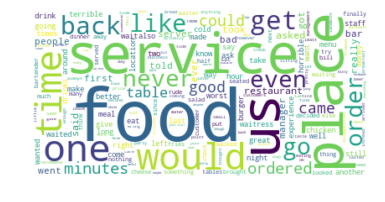

In [69]:
mini_df = df[:10000]
one_star_words = word_freq_generator(mini_df, 'stars', 1)
word_cloud(one_star_words)